In [225]:
# pip install xlrd 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 한글지원 설정 
import matplotlib as mpl 
mpl.rcParams['axes.unicode_minus'] = False
plt.rc('font',family='Malgun Gothic')

import warnings
warnings.filterwarnings("ignore", category=UserWarning)

In [433]:
df = pd.read_excel("C:/Users/user/OneDrive/바탕 화면/SESAC-2/SESSION/notExercise.xls")

In [435]:
#explore data

In [437]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   기간                 53 non-null     int64  
 1   대분류                53 non-null     object 
 2   분류                 53 non-null     object 
 3   운동을 할 충분한 시간이 없어서  53 non-null     float64
 4   함께 운동을 할 사람이 없어서   53 non-null     object 
 5   운동을 할 만한 장소가 없어서   53 non-null     float64
 6   운동을 싫어해서           53 non-null     float64
 7   기타                 53 non-null     object 
dtypes: float64(3), int64(1), object(4)
memory usage: 3.4+ KB


In [439]:
df.head(5)

,기간,대분류,분류,운동을 할 충분한 시간이 없어서,함께 운동을 할 사람이 없어서,운동을 할 만한 장소가 없어서,운동을 싫어해서,기타
0,2017,서울시,서울시,49.7,8.1,5.8,34.7,1.7
1,2017,성별,남자,55.2,7.9,5.5,29.8,1.6
2,2017,성별,여자,45.0,8.3,6.0,38.8,1.8
3,2017,연령별,10대,55.7,6.1,5.6,32.2,0.3
4,2017,연령별,20대,54.8,6.9,5.2,32.9,0.1


In [441]:
df.isnull().sum() #결측치 확인 

기간                   0
대분류                  0
분류                   0
운동을 할 충분한 시간이 없어서    0
함께 운동을 할 사람이 없어서     0
운동을 할 만한 장소가 없어서     0
운동을 싫어해서             0
기타                   0
dtype: int64

In [443]:
df['대분류']

0       서울시
1        성별
2        성별
3       연령별
4       연령별
5       연령별
6       연령별
7       연령별
8       연령별
9       학력별
10      학력별
11      학력별
12      학력별
13      소득별
14      소득별
15      소득별
16      소득별
17      소득별
18      소득별
19    혼인상태별
20    혼인상태별
21    혼인상태별
22    혼인상태별
23    지역대분류
24    지역대분류
25    지역대분류
26    지역대분류
27    지역대분류
28      종로구
29       중구
30      용산구
31      성동구
32      광진구
33     동대문구
34      중랑구
35      성북구
36      강북구
37      도봉구
38      노원구
39      은평구
40     서대문구
41      마포구
42      양천구
43      강서구
44      구로구
45      금천구
46     영등포구
47      동작구
48      관악구
49      서초구
50      강남구
51      송파구
52      강동구
Name: 대분류, dtype: object

In [445]:
df['분류']

0              서울시
1               남자
2               여자
3              10대
4              20대
5              30대
6              40대
7              50대
8           60대 이상
9            중졸 이하
10           고졸 이하
11           대졸 이하
12          대학원 이상
13        100만원 미만
14    100-200만원 미만
15    200-300만원 미만
16    300-400만원 미만
17    400-500만원 미만
18        500만원 이상
19              기혼
20              미혼
21           이혼/별거
22              사별
23             도심권
24             동북권
25             서북권
26             서남권
27             동남권
28             종로구
29              중구
30             용산구
31             성동구
32             광진구
33            동대문구
34             중랑구
35             성북구
36             강북구
37             도봉구
38             노원구
39             은평구
40            서대문구
41             마포구
42             양천구
43             강서구
44             구로구
45             금천구
46            영등포구
47             동작구
48             관악구
49             서초구
50             강남구
51             송파구
52          

In [2]:
#grouping categories
categories = [
    '운동을 할 충분한 시간이 없어서',
    '함께 운동을 할 사람이 없어서',
    '운동을 할 만한 장소가 없어서',
    '운동을 싫어해서'
]

## **연령별**

In [450]:
#filtering 
age = df[df['대분류'] == '연령별']
age.head(5)

,기간,대분류,분류,운동을 할 충분한 시간이 없어서,함께 운동을 할 사람이 없어서,운동을 할 만한 장소가 없어서,운동을 싫어해서,기타
3,2017,연령별,10대,55.7,6.1,5.6,32.2,0.3
4,2017,연령별,20대,54.8,6.9,5.2,32.9,0.1
5,2017,연령별,30대,58.1,5.5,4.6,31.6,0.2
6,2017,연령별,40대,57.7,6.8,5.2,29.4,1
7,2017,연령별,50대,50.1,9.2,7.2,32.2,1.4


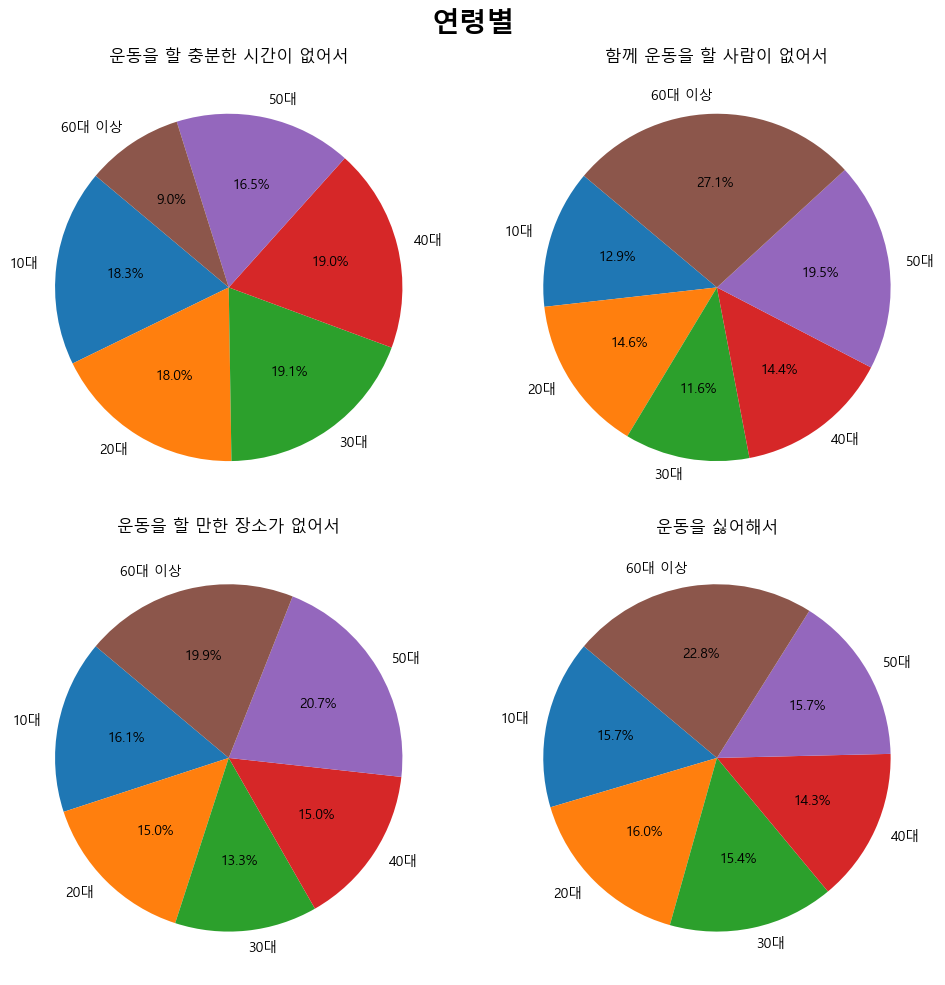

In [452]:
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

for i, category in enumerate(categories):
    row, col = divmod(i, 2) 
     # 연령별 합계 계산
    grouped_age = age.groupby('분류')[category].sum() 
    
    axes[row, col].pie(
        grouped_age,
        labels=grouped_age.index,
        autopct='%1.1f%%',
        startangle=140
    )
    axes[row, col].set_title(f'{category}')
    
# 차트 한번에 보이게 레이아웃 조정하기.
fig.suptitle('연령별', fontsize=20, fontweight='bold')
plt.tight_layout()
plt.show()

### **Age classification Total results:**
### 1. 시간 부족 문제는 30~40대에서 두드러짐
#### - 직장, 가사 일 책임에 따른 것들이 주요 원인일 가능성이 큼 
### 2. 운동 파트너 부족 = 사회적 연결 부족 은 고령층에서 두드러짐 
#### - 고령층에서의 사회적 외로움을 시사할 수 있음.
### 3. 운동 장소 부족은 50대와 60대 에서 중요 
#### - 관련 나이대의 시설 부족이나 접근성의 문제가 있을 수 있음. 
### 4. 운동에 대한 부정적 태도는 고령층이 가장 큼 
#### - 신체적 제약의 가능성이 큼. 
### 

## **성별**

In [455]:
sex = df[df['대분류'] == '성별']
sex

,기간,대분류,분류,운동을 할 충분한 시간이 없어서,함께 운동을 할 사람이 없어서,운동을 할 만한 장소가 없어서,운동을 싫어해서,기타
1,2017,성별,남자,55.2,7.9,5.5,29.8,1.6
2,2017,성별,여자,45.0,8.3,6.0,38.8,1.8


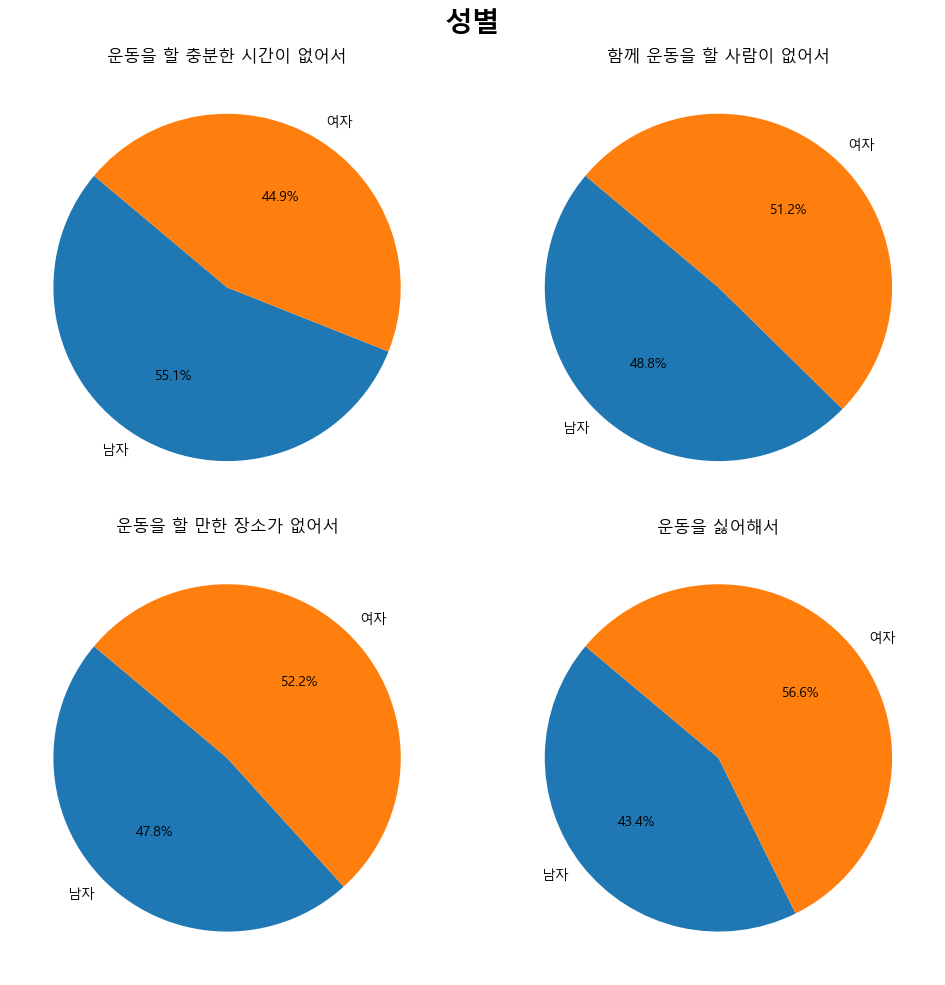

In [466]:
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

for i, category in enumerate(categories):
    row, col = divmod(i, 2)  
     # 성별 그룹화 후 합계 계산
    grouped_sex = sex.groupby('분류')[category].sum() 
    
    if grouped_sex.empty:
        axes[row, col].text(0.5, 0.5, '데이터 없음', fontsize=12, ha='center')
    else:
        axes[row, col].pie(
            grouped_sex,
            labels=grouped_sex.index,
            autopct='%1.1f%%',
            startangle=140
        )
    axes[row, col].set_title(f'{category}')
    
fig.suptitle('성별', fontsize=20, fontweight='bold')
plt.tight_layout()
plt.show()

## **Sex classification Total results:**
### 1. 남성
#### - 시간부족(55.1%)이 운동 부족의 가장 큰 이유
#### - 운동파트너 부족과 장소 부족이 비슷한 수준의 영향을 미침 
#### -> Suggestion: 짧은 시간안에 가능한 운동이나 동료 운동 을 촉진하기 위한 커뮤니티 기반 운동을 추천 
### 2. 여성
#### - 운동을 싫어하는 이유(56.6%)가 가장 두드러짐 
#### - 운동장소 부족(52.5%)과 운동 파트너 부족(51.2%)도 주요한 이유로 나타남
#### -> 운동에 대한 부정적 태도르 ㄹ완화 하고 재미있고 흥미를 유발할 만한 운동을 도입 하거나 운동 장소의 접근성을 높이는 것을 추천
####

## **학력별**

In [196]:
edu = df[df['대분류'] == '학력별']
edu

,기간,대분류,분류,운동을 할 충분한 시간이 없어서,함께 운동을 할 사람이 없어서,운동을 할 만한 장소가 없어서,운동을 싫어해서,기타
9,2017,학력별,중졸 이하,26.1,13.7,6.6,46.2,7.4
10,2017,학력별,고졸 이하,46.3,8.5,6.9,36.5,1.7
11,2017,학력별,대졸 이하,57.4,6.6,4.9,30.7,0.4
12,2017,학력별,대학원 이상,65.3,3.8,0.6,29.6,0.6


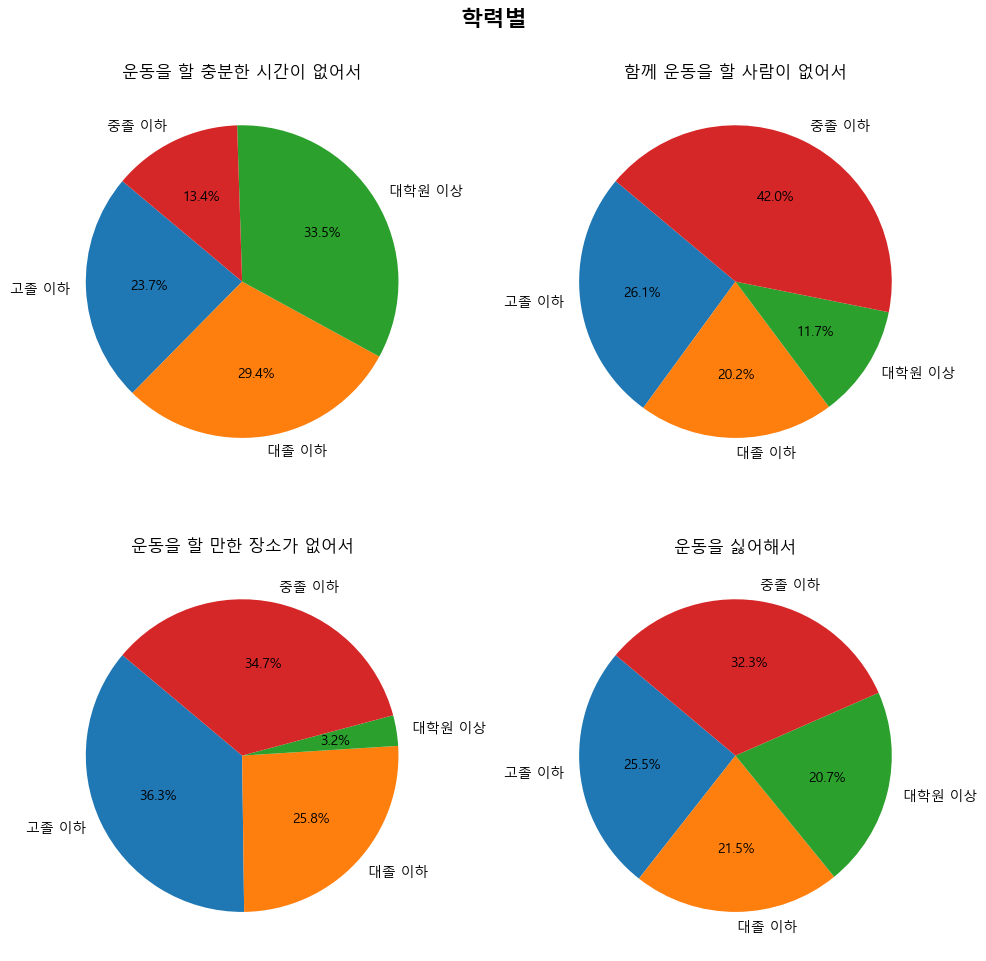

In [210]:
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

for i, category in enumerate(categories):
    row, col = divmod(i, 2)  
     # 성별 그룹화 후 합계 계산
    grouped_edu = edu.groupby('분류')[category].sum() 
    
    if grouped_edu.empty:
        axes[row, col].text(0.5, 0.5, '데이터 없음', fontsize=12, ha='center')
    else:
        axes[row, col].pie(
            grouped_edu,
            labels=grouped_edu.index,
            autopct='%1.1f%%',
            startangle=140
        )
    axes[row, col].set_title(f'{category}')
    
fig.suptitle('학력별', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

## **Education classification Total results:**
### 1. 고학력자(대학원이상~대졸이하)
#### - 운동부족의 가장 큰 이유는 시간 부족(33.5%)
#### - 장소부족이나 운동파트너 부족은 거의 문제가 되지않음 

### 2. 중저학력자(고졸 이하 및 중졸 이하)
#### - 운동장소 부족 (고졸이하 : 36.3%, 중졸 이하 : 34.7%)과 운동을 싫어하는  태도 가 주요 원인 
#### - 사회적 연결 부족 문제도 중졸이하(42.0%)에서 두드러짐 
####

## **지역별 (서울시 구별)**

In [245]:
#['대분류']에서 '구'라는 문자열이 포함된 값 = 필터링된 "서울 구별"이라는 데이터 추가 
df['서울 구별'] = df['대분류'].apply(lambda x: x if '구' in str(x) else None)
# seoul_data = df[df['서울 구별'].notnull()]
seoul_data

,기간,대분류,분류,운동을 할 충분한 시간이 없어서,함께 운동을 할 사람이 없어서,운동을 할 만한 장소가 없어서,운동을 싫어해서,기타,서울 구별
28,2017,종로구,종로구,41.4,18.2,7.8,32.4,0.2,종로구
29,2017,중구,중구,51.0,1.2,1.9,40.5,5.5,중구
30,2017,용산구,용산구,55.9,3.8,4.3,36.0,-,용산구
31,2017,성동구,성동구,50.5,5,6.8,37.8,-,성동구
32,2017,광진구,광진구,49.1,8.5,5.6,32.5,4.4,광진구
33,2017,동대문구,동대문구,47.2,1.7,3.4,43.6,4.2,동대문구
34,2017,중랑구,중랑구,47.9,3.9,5.7,42.0,0.4,중랑구
35,2017,성북구,성북구,43.4,16.1,6.1,33.4,1,성북구
36,2017,강북구,강북구,48.4,7.2,6.7,37.7,-,강북구
37,2017,도봉구,도봉구,52.0,8.6,5.1,32.0,2.3,도봉구


In [274]:
grouped_seoul = grouped_seoul.apply(pd.to_numeric, errors='coerce').fillna(0)

In [276]:
grouped_seoul = seoul_data.groupby('서울 구별')[
    ['운동을 할 충분한 시간이 없어서',
     '함께 운동을 할 사람이 없어서',
     '운동을 할 만한 장소가 없어서',
     '운동을 싫어해서']
].sum()

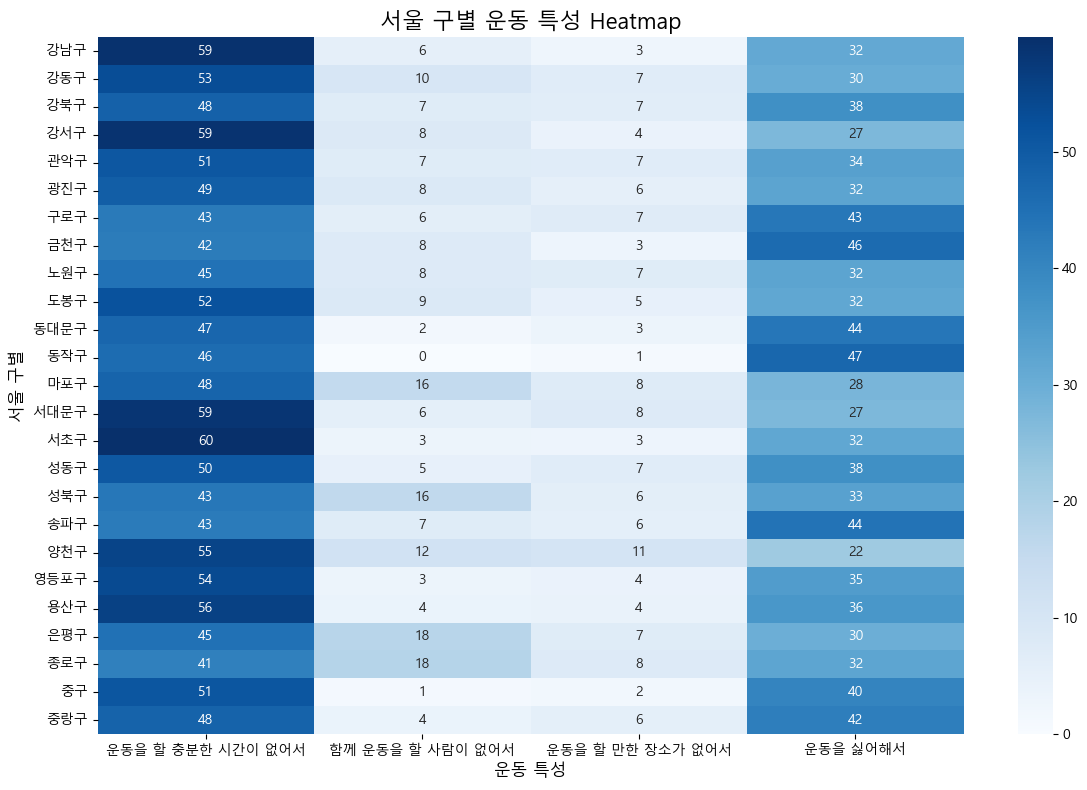

In [330]:
grouped_seoul = grouped_seoul.apply(pd.to_numeric, errors='coerce').fillna(0)


plt.figure(figsize=(12, 8))
sns.heatmap(grouped_seoul, annot=True, fmt=".0f", cmap="Blues", cbar=True)

plt.title('서울 구별 운동 특성 Heatmap', fontsize=16)
plt.xlabel('운동 특성', fontsize=12)
plt.ylabel('서울 구별', fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

## **Regional classification Total results:** 
### 1. 시간 부족 문제는 강남, 서초 등 고소득 지역에서 두드러짐
#### - 바쁜 직장생활과 연관되어  있을 가능성이 큼 
### 2. 운동 파트너 부족은 중구와 은평구 같은 상대적으로 덜 밀집된 지역에서 두드러짐.
#### - 이는 사회적 연결과 커뮤니티 활동 강화의 필요성을 시사함. 
### 3. 운동 장소 부족은 금천구, 구로구 같은 개발이 덜 된 지역에서 주요한 문제로 나타남 
#### - 운동 시설  확대 및 접근성 개선이 필요함
### 4. 운동을 싫어하는 태도는 강동구, 도봉구, 성북구에서 두드러짐. 
#### - 운동의 필요성을 홍보하거나 대안적인 운동 프로그램 개발의 필요성
####

## **혼인 상태 별**

In [349]:
marriage = df[df['대분류'] == '혼인상태별']
marriage

,기간,대분류,분류,운동을 할 충분한 시간이 없어서,함께 운동을 할 사람이 없어서,운동을 할 만한 장소가 없어서,운동을 싫어해서,기타,서울 구별
19,2017,혼인상태별,기혼,50.7,7.8,5.4,34.9,1.2,None
20,2017,혼인상태별,미혼,54.3,7.1,5.4,32.2,1,None
21,2017,혼인상태별,이혼/별거,47.4,8.3,6.8,34.9,2.7,None
22,2017,혼인상태별,사별,25.2,14.9,8.9,42.9,8,None


In [351]:
grouped_marriage = marriage.groupby('분류')[
    ['운동을 할 충분한 시간이 없어서', 
     '함께 운동을 할 사람이 없어서', 
     '운동을 할 만한 장소가 없어서', 
     '운동을 싫어해서']
].sum()

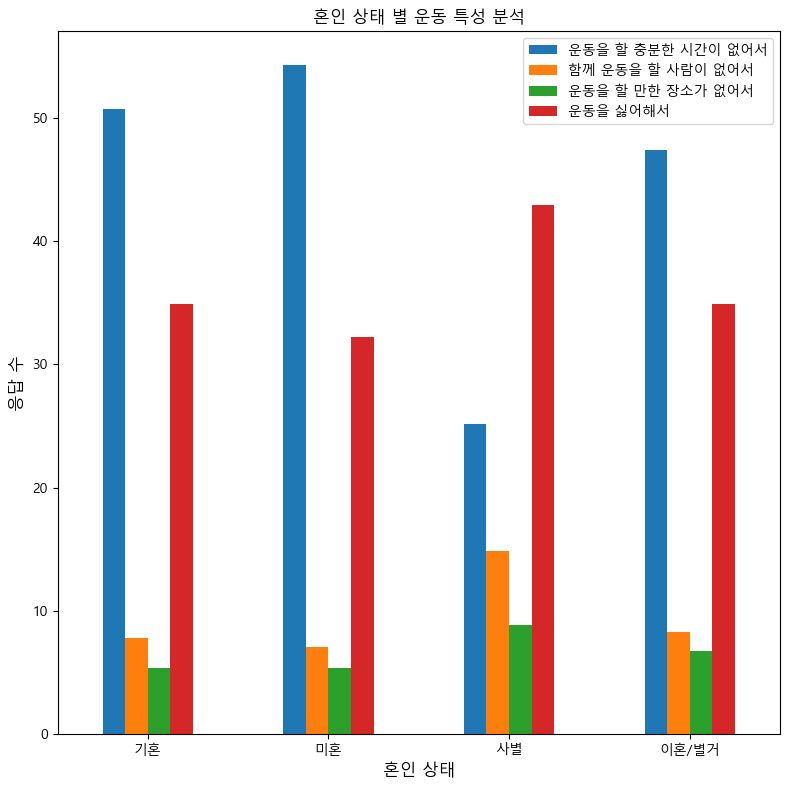

In [369]:
grouped_marriage.plot(kind='bar',figsize=(8,8))
plt.title('혼인 상태 별 운동 특성 분석')
plt.xlabel('혼인 상태',fontsize=12)
plt.xticks(rotation=0)
plt.ylabel('응답 수',fontsize=12)
plt.tight_layout()
plt.show()

## **Marriage classification Total results:**
### 1. 기혼과 이혼/별거: 
#### - 시간 부족으로 인한 운동 부족 응답수 많음 
### 2. 미혼
#### - 운동 파트너 부족이 가장 많은 응답수를 기록 
#### - 그룹 운동이나 커뮤니티 활동을 적극적으로 홍보하는 것이 필요해보임. 
### 3. 사별
#### - 운동 부족과 관련된 문제가 약간 두드러짐. 
#### - 특히 노령층을 대상으로 한 공공체육 시설 접근성 개선이 필요해보임. 
### 4. 운동을 싫어하는 태도
#### - 홍인 상태와 관계 없이 일정한 비율로 나타남. 
###

In [387]:
# 운동 부족의 이유를 연령 ,성별, 학력 기준으로 교차 분석 

In [394]:
print(df.columns)

Index(['기간', '대분류', '분류', '운동을 할 충분한 시간이 없어서', '함께 운동을 할 사람이 없어서',
       '운동을 할 만한 장소가 없어서', '운동을 싫어해서', '기타', '서울 구별'],
      dtype='object')


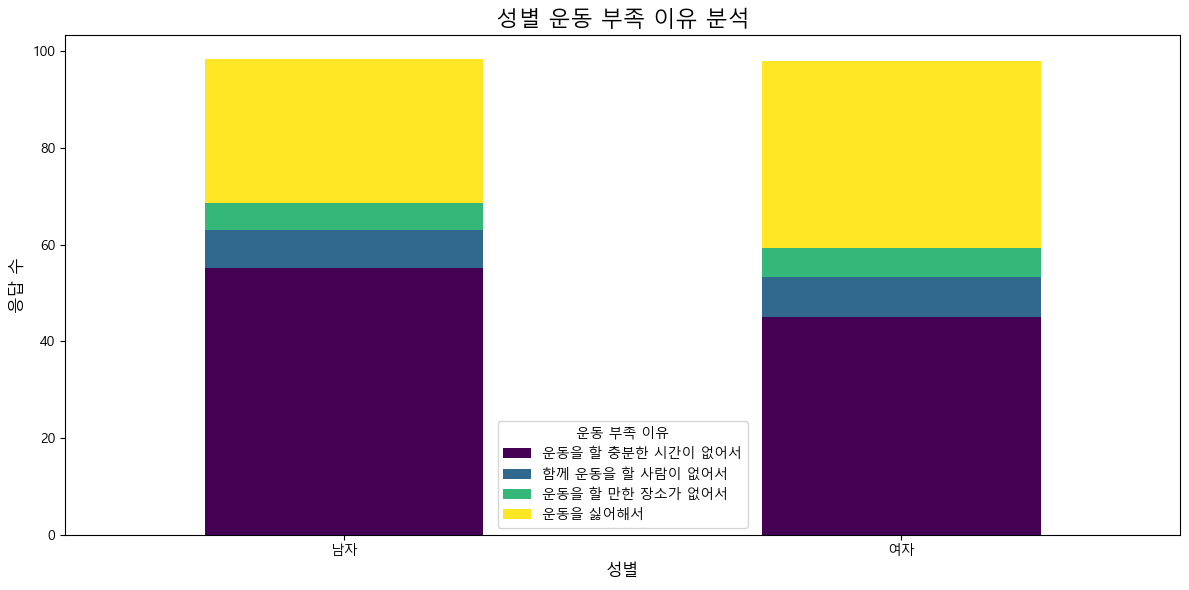

In [423]:
grouped_sex.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='viridis')
plt.title('성별 운동 부족 이유 분석', fontsize=16)
plt.xlabel('성별', fontsize=12)
plt.ylabel('응답 수', fontsize=12)
plt.legend(title='운동 부족 이유')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [ ]:
# 연령대별 운동 부족 이유 분석 

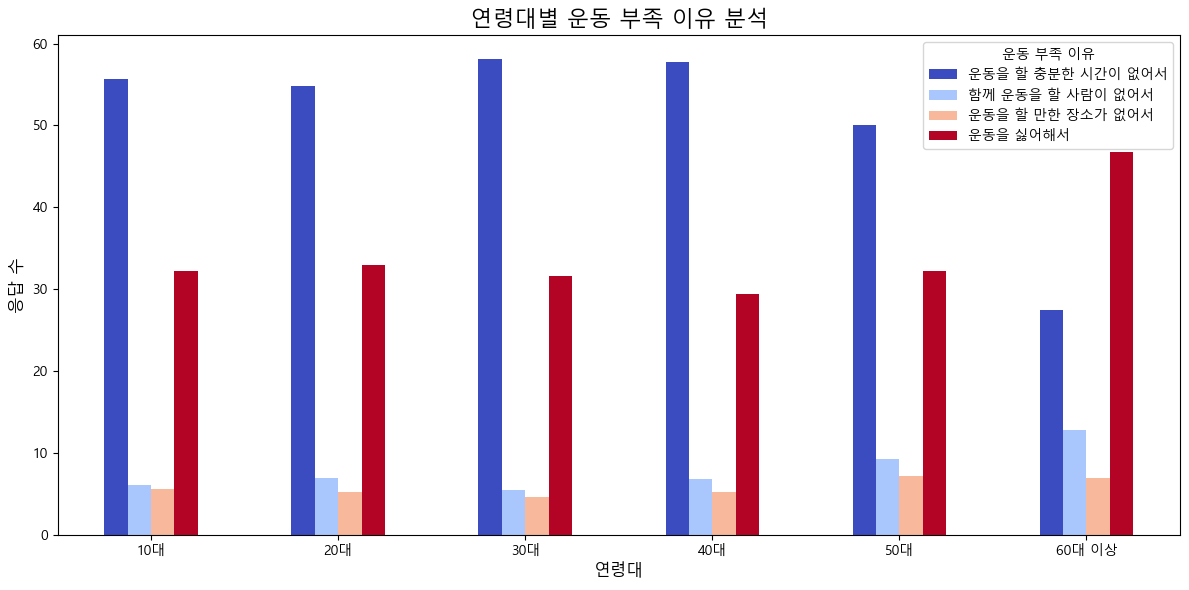

In [425]:
grouped_age.plot(kind='bar', figsize=(12, 6), colormap='coolwarm')
plt.title('연령대별 운동 부족 이유 분석', fontsize=16)
plt.xlabel('연령대', fontsize=12)
plt.ylabel('응답 수', fontsize=12)
plt.legend(title='운동 부족 이유')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [413]:
# 지역 대 분류 별 운동 부족 이유 분석 

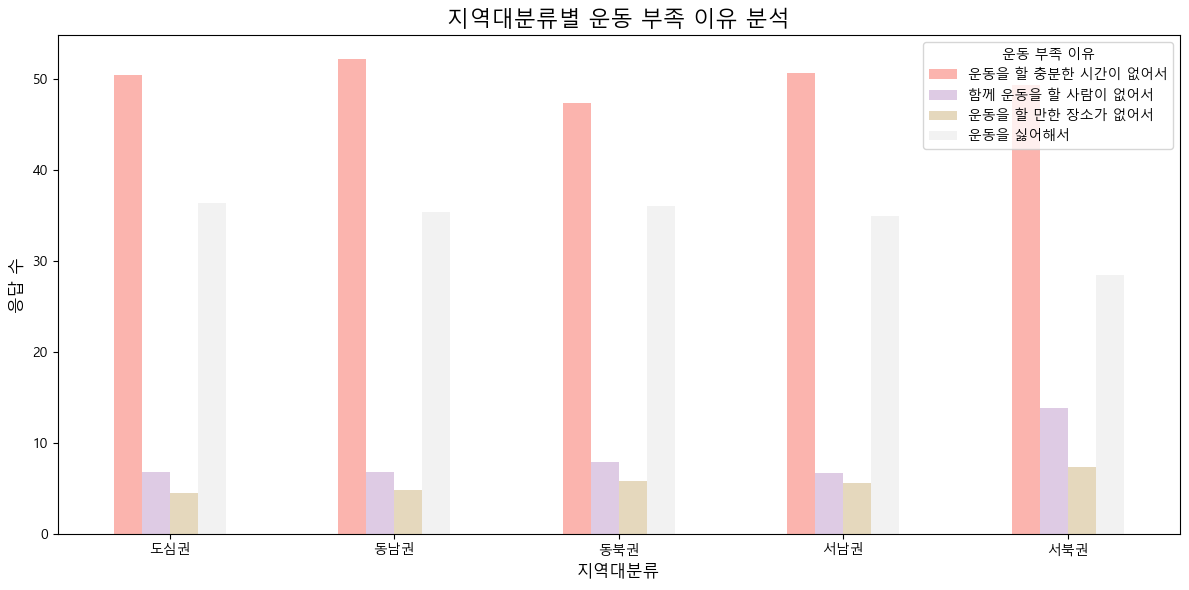

In [427]:
# 지역구별 필터링 
regional = df[df['대분류'] == '지역대분류']
grouped_regional = regional.groupby('분류')[categories].sum()

grouped_regional.plot(kind='bar', figsize=(12, 6), colormap='Pastel1')
plt.title('지역대분류별 운동 부족 이유 분석', fontsize=16)
plt.xlabel('지역대분류', fontsize=12)
plt.ylabel('응답 수', fontsize=12)
plt.legend(title='운동 부족 이유')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

#### **대부분의 경우 (지역대분류별, 성별, 연령대별) 운동 부족의 이유는 <span style="color:red">"운동할 충분한 시간이 부족해서"</span> 라는 응답이 가장 많은 비율을 차지.**

In [ ]:
# 지도에 나타내서 분포를 해볼까? 

In [483]:
# pip install folium

In [556]:
import folium
import json 

In [558]:
#서울시 구별 좌표 
seoul_coordinates = {
    '종로구': [37.573050, 126.979189],
    '중구': [37.564213, 126.997788],
    '용산구': [37.532600, 126.990651],
    '성동구': [37.563320, 127.036429],
    '광진구': [37.538500, 127.082295],
    '동대문구': [37.574371, 127.039594],
    '중랑구': [37.606324, 127.092299],
    '성북구': [37.589400, 127.016749],
    '강북구': [37.639938, 127.025732],
    '도봉구': [37.654232, 127.038889],
    '노원구': [37.654990, 127.056980],
    '은평구': [37.617612, 126.922700],
    '서대문구': [37.582045, 126.935525],
    '마포구': [37.566324, 126.901491],
    '양천구': [37.516221, 126.866561],
    '강서구': [37.550964, 126.849532],
    '구로구': [37.495484, 126.887865],
    '금천구': [37.460015, 126.895501],
    '영등포구': [37.526379, 126.896369],
    '동작구': [37.512409, 126.939677],
    '관악구': [37.478374, 126.951559],
    '서초구': [37.483576, 127.032693],
    '강남구': [37.496503, 127.036141],
    '송파구': [37.514543, 127.105880],
    '강동구': [37.530125, 127.123770]
}

In [678]:
# 좌표 데이터를 DataFrame에 매핑
seoul_data['latitude'] = seoul_data['분류'].map(lambda x: seoul_coordinates.get(x, [None, None])[0])
seoul_data['longitude'] = seoul_data['분류'].map(lambda x: seoul_coordinates.get(x, [None, None])[1])

C:\Users\user\AppData\Local\Temp\ipykernel_24844\1191704046.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  seoul_data['latitude'] = seoul_data['분류'].map(lambda x: seoul_coordinates.get(x, [None, None])[0])
C:\Users\user\AppData\Local\Temp\ipykernel_24844\1191704046.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  seoul_data['longitude'] = seoul_data['분류'].map(lambda x: seoul_coordinates.get(x, [None, None])[1])


In [499]:
# 결과 확인
seoul_data[['분류', 'latitude', 'longitude']].head()

,분류,latitude,longitude
28,종로구,37.573050,126.979189
29,중구,37.564213,126.997788
30,용산구,37.532600,126.990651
31,성동구,37.563320,127.036429
32,광진구,37.538500,127.082295


In [650]:
# 응답 수의 최대값과 최소값 계산
min_val = seoul_data['운동을 할 충분한 시간이 없어서'].min()
max_val = seoul_data['운동을 할 충분한 시간이 없어서'].max()

In [670]:
for idx, row in seoul_data.iterrows():
    if not pd.isnull(row['latitude']):
        # 응답 수가 많음에 따라 투명도 down, 색이 짙어지도록 설정 
        opacity = 0.3 + 0.7 * ((row['운동을 할 충분한 시간이 없어서'] - min_val) / (max_val - min_val))  
        color_intensity = int(255 * ((row['운동을 할 충분한 시간이 없어서'] - min_val) / (max_val - min_val))) 
        color = f"rgb({255}, {255 - color_intensity}, {255 - color_intensity})"  # 진한 빨간색


        folium.CircleMarker(
            location=[row['latitude'], row['longitude']],
            radius=10,
            color=color,
            fill=True,
            fill_color=color,
            fill_opacity=opacity,
            tooltip=f"{row['분류']}: {row['운동을 할 충분한 시간이 없어서']}"
        ).add_to(seoul_map)

In [596]:
# 근데 뭔가 점만 찍기에는 지역별 구분도 잘 안되어 보여서 
# 서울시 구별로 POLYGON으로 나누 어보려고함 
# 어느 지역에서 운동을 할 충분할 시간이 없다고 나오는지 한눈에 보기 위해서! 

In [652]:
# 지역구 POLYGON이 나오ㅏ있는 json데이터를 찾아옴 
geojson_path = "C:/Users/user/OneDrive/바탕 화면/SESAC-2/SESSION/seoul_municipalities_geo_simple.json"

In [672]:
seoul_map = folium.Map(location=[37.5665, 126.9780], zoom_start=11)

def style_function(feature):
    return {
        'color': 'blue',  
        'weight': 2,  
        'fillOpacity': 0.01
    }

# 색좀 바꿀게요 
folium.GeoJson(
    geo_data,
    name="구별 경계",
    style_function=style_function,
    tooltip=folium.GeoJsonTooltip(fields=["name"], aliases=["구"])
).add_to(seoul_map)

for idx, row in seoul_data.iterrows():
    if not pd.isnull(row['latitude']):
        # 응답 수가 많음에 따라 투명도 down, 색이 짙어지도록 설정 
        opacity = 0.3 + 0.7 * ((row['운동을 할 충분한 시간이 없어서'] - min_val) / (max_val - min_val))  
        color_intensity = int(255 * ((row['운동을 할 충분한 시간이 없어서'] - min_val) / (max_val - min_val))) 
        color = f"rgb({255}, {255 - color_intensity}, {255 - color_intensity})"  # 진한 빨간색


        folium.CircleMarker(
            location=[row['latitude'], row['longitude']],
            radius=10,
            color=color,
            fill=True,
            fill_color=color,
            fill_opacity=opacity,
            tooltip=f"{row['분류']}: {row['운동을 할 충분한 시간이 없어서']}"
        ).add_to(seoul_map)
seoul_map

In [676]:
# 지도를 봤을때 위의 결과와 같이 "운동 할 충분한시간이 없어서" 의 비율이 가장 높은 지역은 강남구, 서초구로 나타났음. 